In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
import sklearn
from collections import Counter
from sklearn.datasets import make_classification
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pathlib

In [2]:
#  read data
wisc_data = pd.read_csv('/Users/taylor/Desktop/DS340W/term_project/data/wisconsin/data.csv')

In [3]:
wisc_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
wisc_data.drop(['id'], axis=1, inplace=True) # drop id column
wisc_data.diagnosis.replace(['M', 'B'], [1, 0], inplace=True) # replace target class with binary discrete representation

In [5]:
wisc_data.shape # get count of rows and columns

(569, 31)

In [6]:
wisc_data.describe() # get column descriptions

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
# check for missing values
# conclusion: no NAs = no treatment necessary
wisc_data.isna().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave.points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave.points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave.points_worst       False
symmetry_worst             False
fractal_di

In [8]:
#os.getcwd() # get current path

In [9]:
correlations = wisc_data.corr() # get feature correlations
#correlations.to_csv("correlations.csv", index = False) # export correlations

In [10]:
# Looking at the correlations below, we see a number of fields are highly correlated:

<AxesSubplot: >

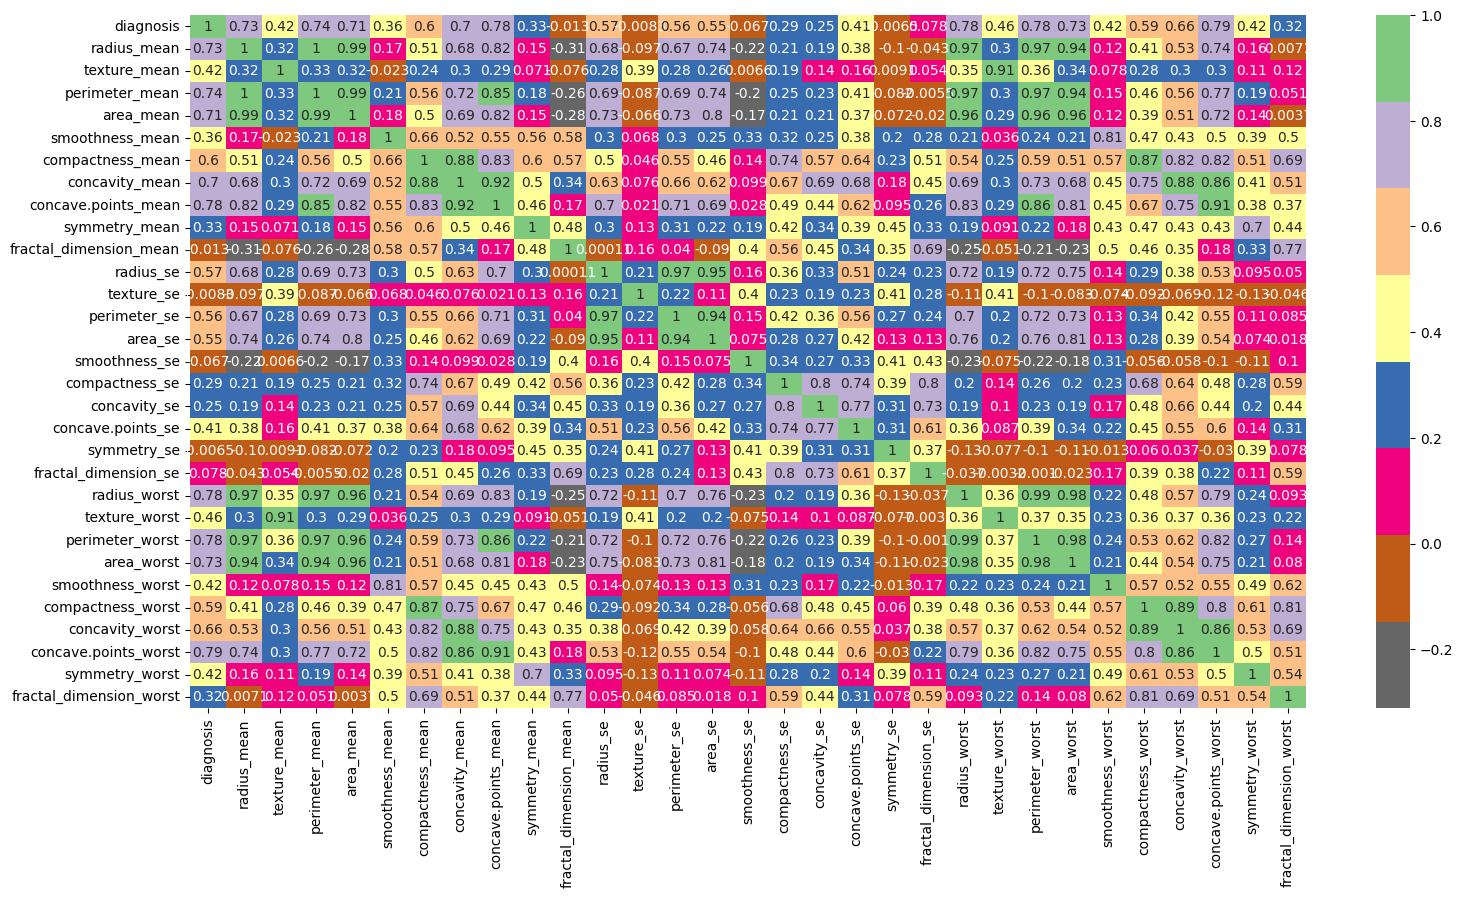

In [11]:
plt.figure(figsize=(18,9))
sns.heatmap(correlations,annot = True, cmap ="Accent_r")

In [12]:
# Further investigating feature relationships...

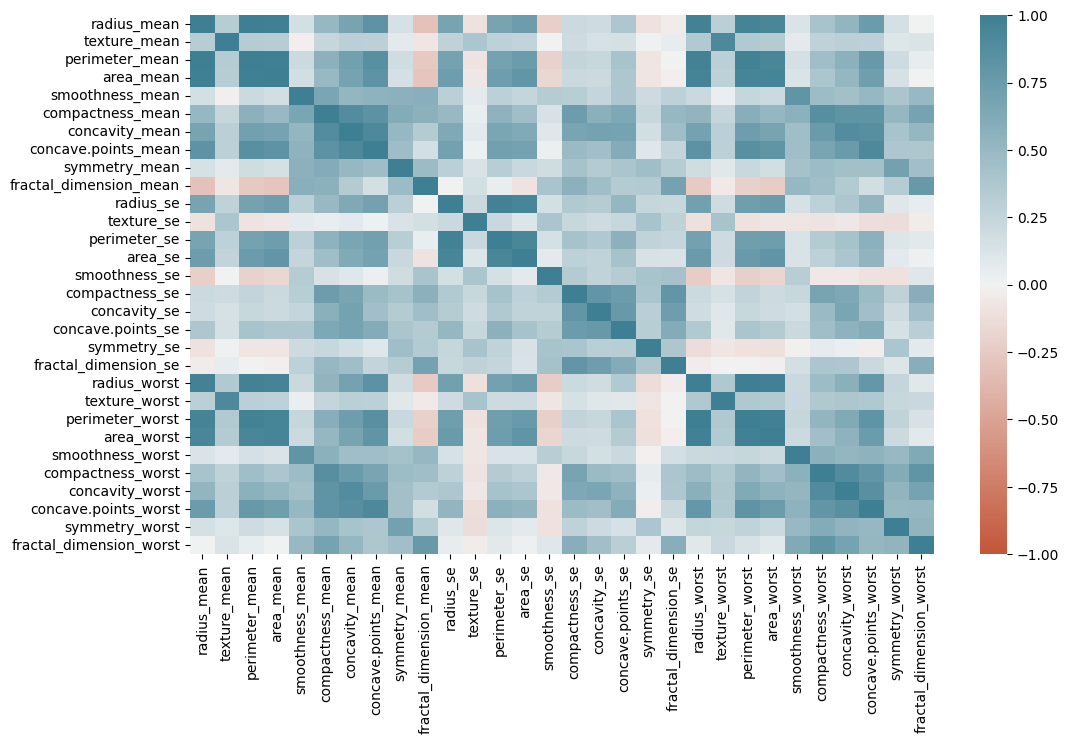

In [13]:
y = wisc_data['diagnosis']
x = wisc_data.drop('diagnosis', axis=1)
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(x.corr(), vmin=-1, vmax=1,
            cmap=sns.diverging_palette(20, 220, as_cmap=True), 
            yticklabels=True) # show all y values

plt.show()

In [14]:
# Find top correlated features relative to target
correlations.sort_values(['diagnosis'], ascending=False, inplace=True)
correlations.diagnosis[:25]

diagnosis                  1.000000
concave.points_worst       0.793566
perimeter_worst            0.782914
concave.points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave.points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
Name: diagnosis, dtype: float64

In [15]:
wisc_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
# Note: From above, Top 10 Features directly correlating to Diagnosis are...

    # concave.points_worst
    # perimeter_worst
    # concave.points_mean
    # radius_worst
    # perimeter_mean
    # area_worst
    # radius_mean
    # area_mean
    # concavity_mean
    # concavity_worst

In [17]:
# Assessing skewness...
wisc_data.skew().sort_values(ascending=False)

area_se                    5.447186
concavity_se               5.110463
fractal_dimension_se       3.923969
perimeter_se               3.443615
radius_se                  3.088612
smoothness_se              2.314450
symmetry_se                2.195133
compactness_se             1.902221
area_worst                 1.859373
fractal_dimension_worst    1.662579
texture_se                 1.646444
area_mean                  1.645732
compactness_worst          1.473555
concave.points_se          1.444678
symmetry_worst             1.433928
concavity_mean             1.401180
fractal_dimension_mean     1.304489
compactness_mean           1.190123
concave.points_mean        1.171180
concavity_worst            1.150237
perimeter_worst            1.128164
radius_worst               1.103115
perimeter_mean             0.990650
radius_mean                0.942380
symmetry_mean              0.725609
texture_mean               0.650450
diagnosis                  0.528461
texture_worst              0

In [18]:
### Treating skewness and normalizing/scaling data ### ### ###

In [19]:
y = wisc_data["diagnosis"]
features = wisc_data.drop(["diagnosis"], axis = 1) 
sq_features = features.copy()

for i in sq_features.columns:
    sq_features[i] = np.sqrt(sq_features[i]) 
    
features = pd.DataFrame(sq_features)

In [20]:
#sq_features
wisc_unskewed = pd.concat([features, y], axis=1)

In [21]:
wisc_unskewed.skew().sort_values(ascending=False) # sanity check

area_se                    2.141981
fractal_dimension_se       1.765806
perimeter_se               1.635855
radius_se                  1.477656
symmetry_se                1.343412
smoothness_se              1.206641
fractal_dimension_worst    1.180458
area_worst                 1.107839
fractal_dimension_mean     1.068065
concavity_se               0.937892
area_mean                  0.933839
compactness_se             0.903304
symmetry_worst             0.890223
perimeter_worst            0.786099
radius_worst               0.783175
texture_se                 0.741415
perimeter_mean             0.653536
radius_mean                0.622870
compactness_worst          0.604870
compactness_mean           0.564793
diagnosis                  0.528461
symmetry_mean              0.441233
concavity_mean             0.360016
texture_mean               0.309895
concave.points_mean        0.243789
smoothness_mean            0.190934
texture_worst              0.180188
smoothness_worst           0

In [22]:
scaler = MinMaxScaler()
numerical =['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave.points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave.points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave.points_worst',
 'symmetry_worst',
 'fractal_dimension_worst'] 
wisc_unskewed[numerical] = scaler.fit_transform(wisc_unskewed[numerical])

In [23]:
wisc_unskewed.shape

(569, 31)

In [24]:
#print(imblearn.__version__)

In [25]:
# Below, we investigate the distribution of our target class

In [26]:
wisc_unskewed['diagnosis'] = pd.Categorical(wisc_unskewed['diagnosis'])
wisc_unskewed['diagnosis'] = wisc_unskewed['diagnosis'].cat.codes
wisc_unskewed['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [27]:
# Note: There are 145 more benign cases than malignant

    # 62.74% of observations are Benign
    # 37.26% of observations are Malignant

In [28]:
# Visualizing target class distribution...

<AxesSubplot: >

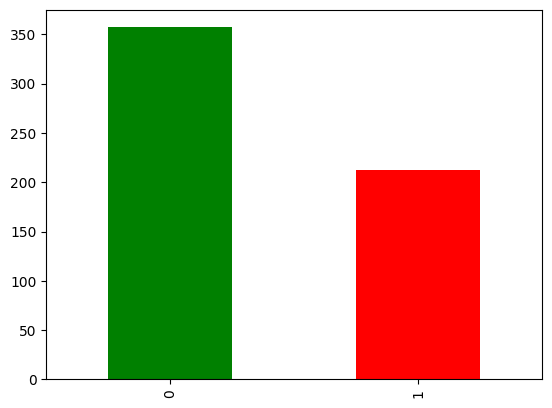

In [29]:
wisc_unskewed['diagnosis'].value_counts().plot(kind='bar', color=("green", "red"))

In [30]:
### Save out train and test and address class imbalance in R ### ### ###

In [31]:
# split data into training and testing sets
X = wisc_unskewed.drop('diagnosis', axis=1)
y = wisc_unskewed.diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
wisc_train = pd.concat([X_train, y_train], axis=1)
wisc_test = pd.concat([X_test, y_test], axis=1)

In [33]:
# save and export dataframes
wisc_train.to_csv("wisconsin_train.csv", index = False)
wisc_test.to_csv("wisconsin_test.csv", index = False)